In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold
from matplotlib.pyplot import plot
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [60]:
df_full = pd.read_csv("/Users/leafy/Documents/ds_final_project/kag_risk_factors_cervical_cancer.csv")

In [61]:
df_fullna = df_full.replace('?', np.nan)

In [62]:
df = df_fullna  #making temporary save
df = df.convert_objects(convert_numeric=True) #turn data into numeric type for computation

In [63]:
# for continuous variable
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [64]:
# for categorical variable
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx'])
data = df

In [143]:
print(data)

     Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                      17.0   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
5     42                        3.0                      23.0   
6     51                        3.0                      17.0   
7     26                        1.0                      26.0   
8     45                        1.0                      20.0   
9     44                        3.0                      15.0   
10    44                        3.0                      26.0   
11    27                        1.0                      17.0   
12    45                        4.0                      14.0   
13    44                        2.0                      25.0   
14    43                 

In [55]:
# drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
drop_cols = ["Biopsy"]
X = data.drop(drop_cols,axis=1) 
y = data['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
ros = RandomOverSampler(random_state=0)
# ros = SMOTE(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_resampled_scaled = minmax_scale.fit_transform(X_resampled)
X_test_scaled = minmax_scale.fit_transform(X_test)

# scaler = StandardScaler()
# scaler.fit(X_resampled)
# X_resampled_scaled = scaler.transform(X_resampled)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import RidgeClassifier
rid = RidgeClassifier()
rid.fit(X_resampled_scaled, y_resampled)
predicted = np.round(rid.predict(X_test_scaled))
print(cohen_kappa_score(y_test, predicted))
conf = confusion_matrix(y_test, predicted)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
lascv = LassoCV()
lascv.fit(X_resampled_scaled, y_resampled)
predicted = np.round(lascv.predict(X_test_scaled))

print(cohen_kappa_score(y_test, predicted))
conf = confusion_matrix(y_test, predicted)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel = "rbf")
svc.fit(X_resampled_scaled, y_resampled)
predicted = svc.predict(X_test_scaled)
print(cohen_kappa_score(y_test, predicted))
conf = confusion_matrix(y_test, predicted)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 2000, class_weight="balanced", random_state=None)
rf.fit(X_resampled, y_resampled)
predicted = rf.predict(X_test)
print(cohen_kappa_score(y_test, predicted))
conf = confusion_matrix(y_test, predicted)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()

In [ ]:
from imblearn import metrics
print(metrics.sensitivity_score(y_test, predicted))

In [69]:
# ros = RandomOverSampler(random_state=0)
# ros = SMOTE(random_state=0)
ros = ADASYN(random_state=0)

# Models using Cross-Validation

## RidgeClassifier

FOLD 0
-0.023023791250959214


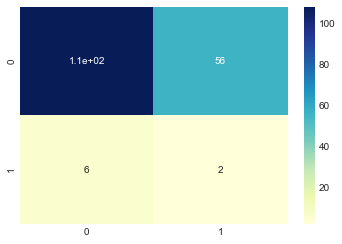

FOLD 1
-0.006408470325995896


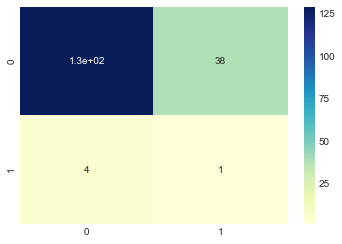

FOLD 2
0.01285583103764909


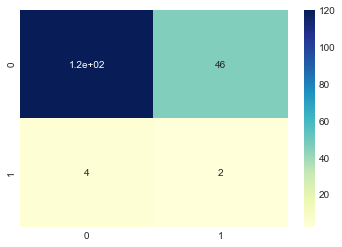

FOLD 3
-0.036363636363636376


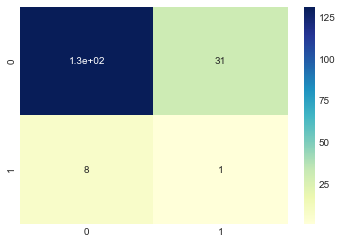

FOLD 4
0.004751158094785768


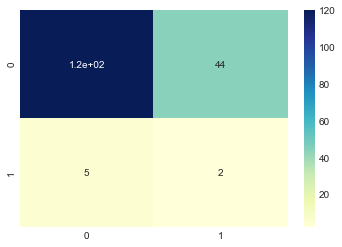

average cohen_kappa_score is -0.009637781761631325
average accuracy is 0.7180062559499524
average recall is 0.23603174603174598


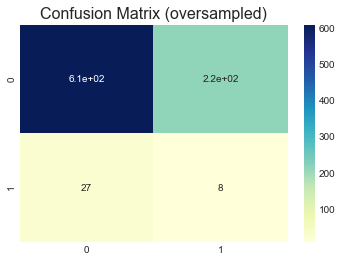

In [108]:
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
rid = RidgeClassifier()
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
# for i,j in enumerate(label):
#     if j == 0:
#         label[i] = -1
test_label_all = []
predicted_all = []

for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    rid.fit(train_data_scaled, train_label_resampled)
    predicted = rid.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = rid.score(test_data_scaled, test_label)
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (oversampled)", fontsize=16)
plt.show()

FOLD 0
0.0


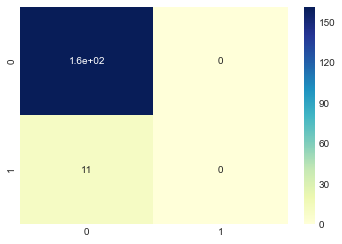

FOLD 1
0.0


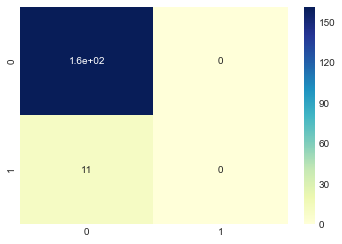

FOLD 2
-0.02033898305084758


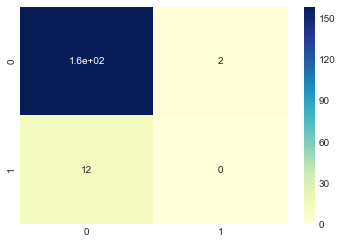

FOLD 3
0.0


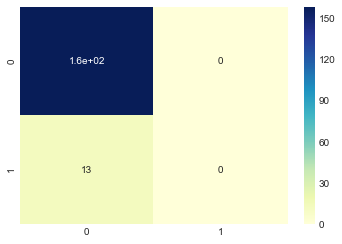

FOLD 4
0.0


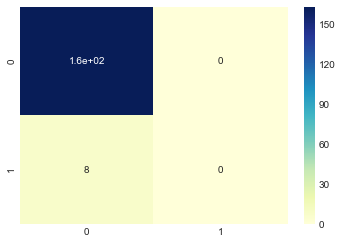

average cohen_kappa_score is -0.004067796610169516
average accuracy is 0.9335781313749489
average cohen_kappa_score is -0.004067796610169516
average accuracy is 0.9335781313749489


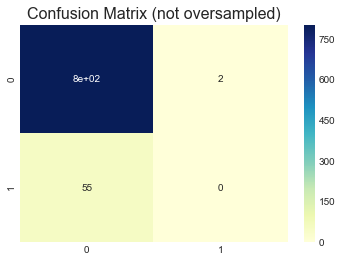

In [96]:
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
rid = RidgeClassifier()
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Biopsy'])

test_label_all = []
predicted_all = []

for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
#     train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data)
    test_data_scaled = minmax_scale.transform(test_data)
    
    rid.fit(train_data_scaled, train_label)
    predicted = rid.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    acc[fold_index] = rid.score(test_data_scaled, test_label)
    
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (not oversampled)", fontsize=16)
plt.show()

## svm_linear

FOLD 0
0.06521739130434767


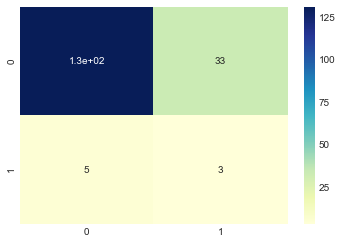

FOLD 1
0.20292682926829275


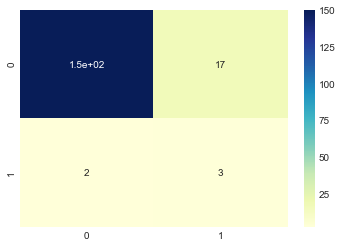

FOLD 2
0.020947176684881552


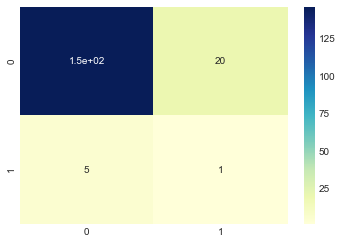

FOLD 3
-0.030120481927710996


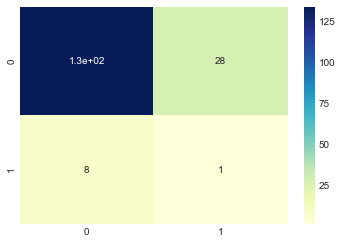

FOLD 4
-0.0066225165562914245


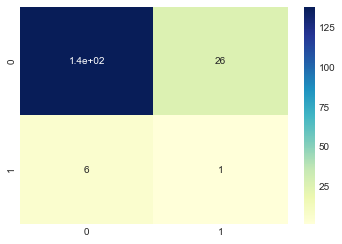

average cohen_kappa_score is 0.050469679754703914
average accuracy is 0.8251189990480077
average cohen_kappa_score is 0.050469679754703914
average accuracy is 0.8251189990480077
average recall is 0.2791269841269841


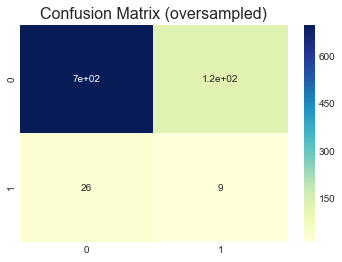

In [112]:
clf = svm.SVC(kernel="linear", C=0.025)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
test_label_all = []
predicted_all = []
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    recall[fold_index] = recall_score(test_label, predicted)
    
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (oversampled)", fontsize=16)
plt.show()

FOLD 0
0.0


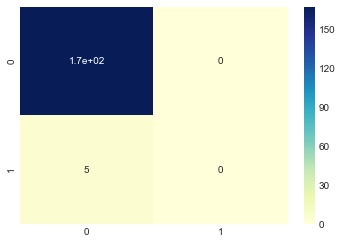

FOLD 1
0.0


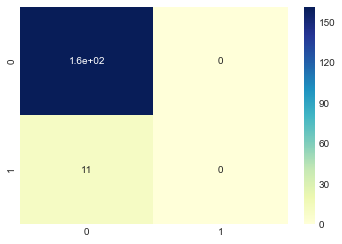

FOLD 2
0.0


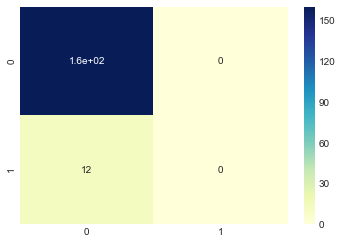

FOLD 3
0.0


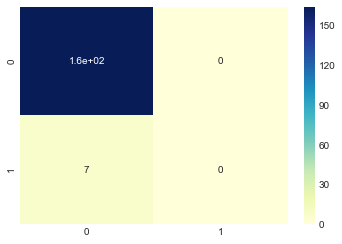

FOLD 4
0.0


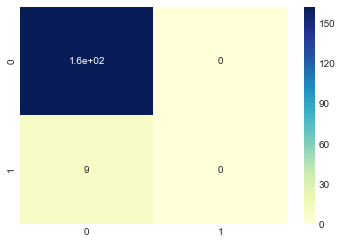

average cohen_kappa_score is 0.0
average accuracy is 0.9487284101727186
average cohen_kappa_score is 0.0
average accuracy is 0.9487284101727186


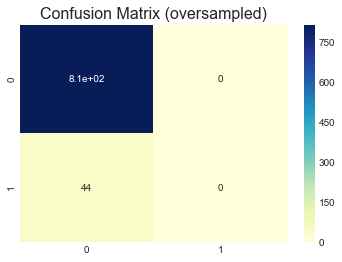

In [94]:
clf = svm.SVC(kernel="linear", C=0.025)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Citology'])
test_label_all = []
predicted_all = []
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (oversampled)", fontsize=16)
plt.show()

## svm_rbf

FOLD 0
-0.0711743772241995


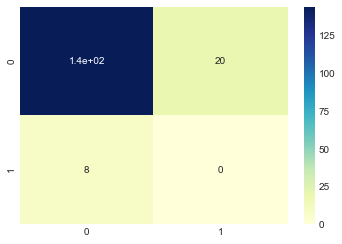

FOLD 1
-0.048247841543930914


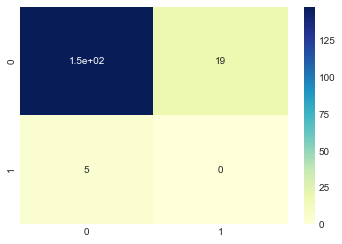

FOLD 2
-0.050128534704370065


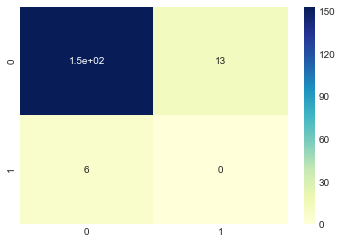

FOLD 3
-0.06145251396648055


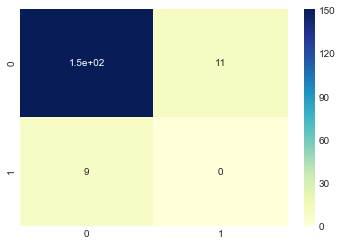

FOLD 4
-0.04565837749694257


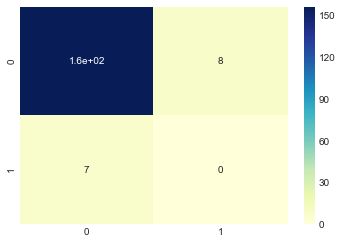

average recall is 0.0
average cohen_kappa_score is -0.05533232898718472
average accuracy is 0.8765061879504964


In [119]:
clf = svm.SVC(gamma=2, C=1)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    
    recall[fold_index] = recall_score(test_label, predicted)
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1

print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))    

## decision tree

FOLD 0
-0.06752730883813318


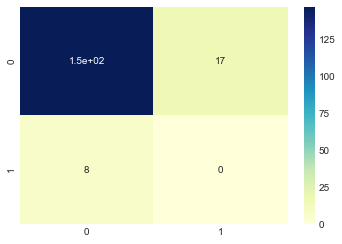

FOLD 1
-0.042796005706134066


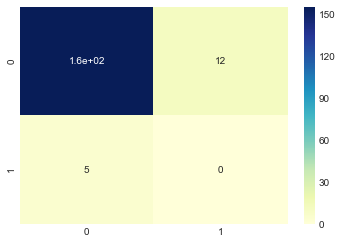

FOLD 2
-0.05521472392638027


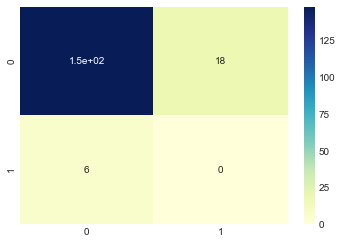

FOLD 3
-0.05865102639296205


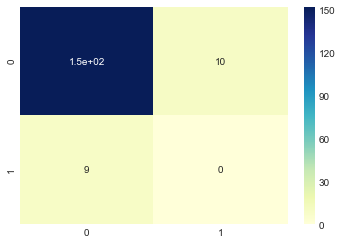

FOLD 4
0.05647517039922101


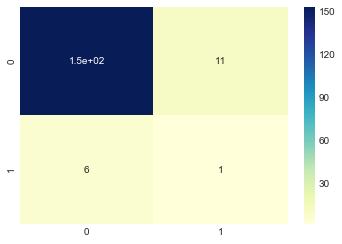

average cohen_kappa_score is -0.03354277889287771
average accuracy is 0.8811505507955937
average recall is 0.02857142857142857


In [123]:
clf = DecisionTreeClassifier(max_depth=15)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data["Hinselmann"])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))    

## random forest

FOLD 0
-0.06458557588805158


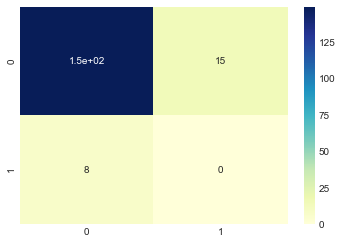

FOLD 1
0.04814609850581064


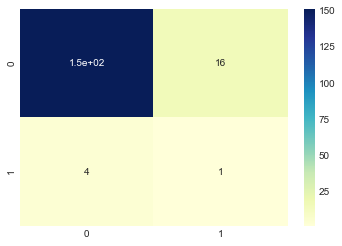

FOLD 2
-0.050128534704370065


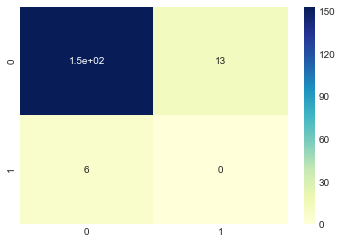

FOLD 3
-0.05865102639296205


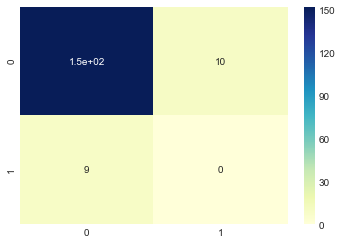

FOLD 4
0.06429548563611487


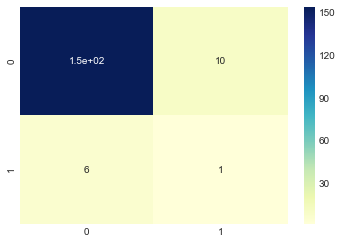

average cohen_kappa_score is -0.012184710568691637
average accuracy is 0.8869713042295662
average recall is 0.06857142857142857


In [127]:
clf = RandomForestClassifier(max_depth=6, n_estimators=200, max_features=1)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    
    recall[fold_index] = recall_score(test_label, predicted)
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))    

## logistic regression

FOLD 0
-0.025335320417287477


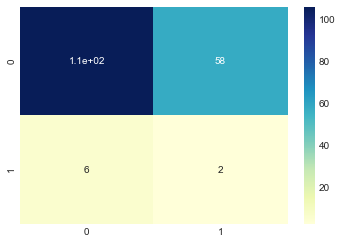

FOLD 1
0.08291122367368708


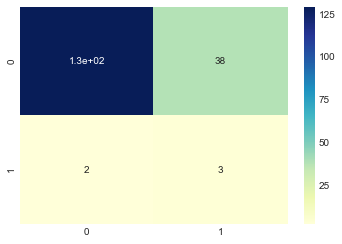

FOLD 2
0.04782993799822843


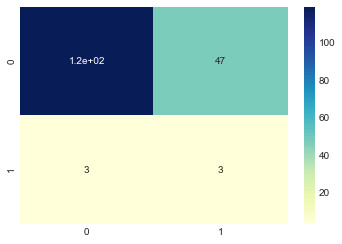

FOLD 3
-0.04177545691906026


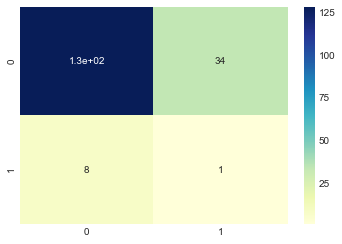

FOLD 4
0.008389882788402137


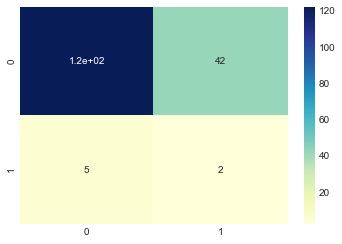

average cohen_kappa_score is 0.014404053424793983
average accuracy is 0.7168366653066777
average recall is 0.3493650793650794


In [131]:
clf = LogisticRegression()
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))  

## SVM with PCA 

FOLD 0
-0.010614101592115066


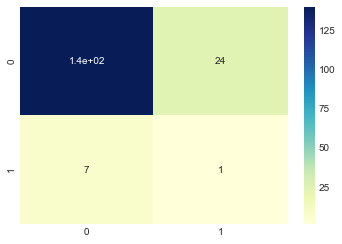

FOLD 1
0.26808510638297867


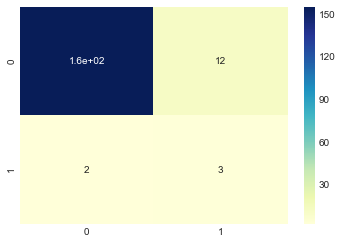

FOLD 2
0.028487229862475538


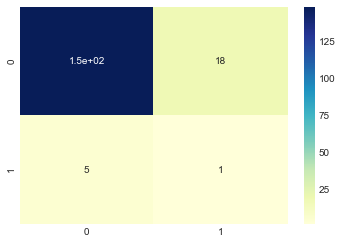

FOLD 3
0.004192872117400492


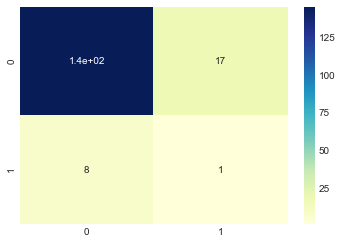

FOLD 4
0.026901189860320862


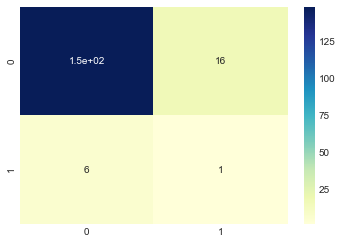

average cohen_kappa_score is 0.0634104593262121
average accuracy is 0.8659594723242214
average recall is 0.22912698412698412


In [137]:
pca = PCA(n_components=5)
clf = svm.SVC(kernel="linear", C=0.025)
# clf = svm.SVC(gamma=2, C=1)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
#drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Hinselmann'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    train_data_scaled = pca.fit_transform(train_data_scaled)
    test_data_scaled = pca.transform(test_data_scaled)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))  

## SVM with ISOMAP

FOLD 0
0.19475655430711603


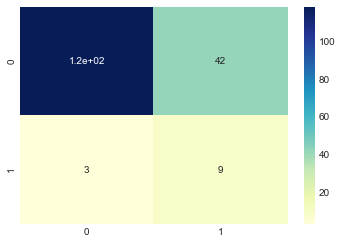

FOLD 1
0.08311575282854655


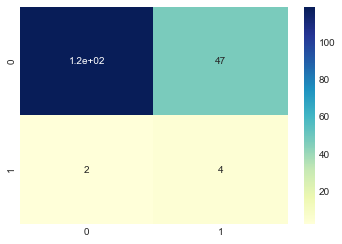

FOLD 2
0.11735089078233929


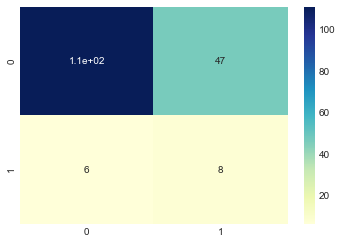

FOLD 3
-0.000302571860816947


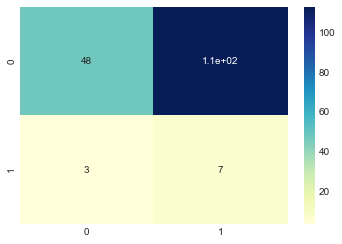

FOLD 4
0.27216836131473154


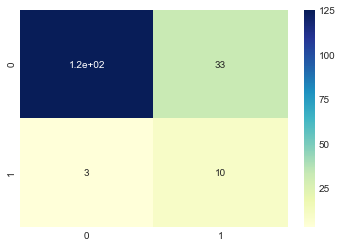

average cohen_kappa_score is 0.1334177974743833
average accuracy is 0.6512919896640825


In [129]:
isomap = Isomap(n_components=5)
# clf = svm.SVC(kernel="linear", C=0.025)
clf = svm.SVC(gamma=2, C=1)
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
kf = KFold(n_splits=k_folds,shuffle=True)

fold_index = 0
#drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
drop_cols = ["Biopsy"]
dat = np.array(data.drop(drop_cols,axis=1))
label = np.array(data['Citology'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    train_data_scaled = isomap.fit_transform(train_data_scaled)
    test_data_scaled = isomap.transform(test_data_scaled)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))

## KNN

In [142]:
cohen_knn = []
acc_knn = []
for i in range(1,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    k_folds = 5
    cohen_kappa = np.zeros(k_folds)
    acc = np.zeros(k_folds)
    recall = np.zeros(k_folds)
    
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold_index = 0
    drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
    #drop_cols = ["Biopsy"]
    dat = np.array(data.drop(drop_cols,axis=1))
    label = np.array(data['Hinselmann'])
    for train_indices, test_indices in kf.split(dat):
        print ("FOLD {}".format(fold_index))

        train_data, test_data = dat[train_indices], dat[test_indices]
        train_label, test_label = label[train_indices], label[test_indices]
        train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)

        minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
        train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
        test_data_scaled = minmax_scale.transform(test_data)

        clf.fit(train_data_scaled, train_label_resampled)
        predicted = clf.predict(test_data_scaled)
        print(cohen_kappa_score(test_label, predicted))
        cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)

        recall[fold_index] = recall_score(test_label, predicted)
        acc[fold_index] = clf.score(test_data_scaled, test_label)

#         conf = confusion_matrix(test_label, predicted)
#         tag = ["0","1"]
#         sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
#         plt.show()
        fold_index += 1
    print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
    print ("average accuracy is {}".format(np.mean(acc)))
    cohen_knn.append(np.mean(cohen_kappa))
    acc_knn.append(np.mean(acc))
    print ("average recall is {}".format(np.mean(recall)))  

FOLD 0
0.01787487586891745
FOLD 1
-0.040322580645161255
FOLD 2
-0.05599214145383091
FOLD 3
-0.05211726384364823
FOLD 4
0.15503397158739973
average cohen_kappa_score is 0.004895372302735357
average accuracy is 0.8881476948184414
average recall is 0.08214285714285714


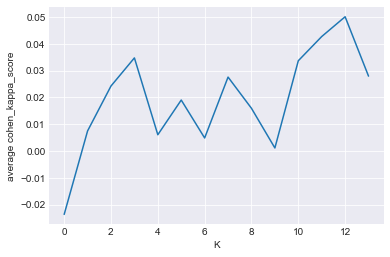

In [79]:
plot(cohen_knn)
plt.ylabel('average cohen_kappa_score')
plt.xlabel('K')
plt.show()

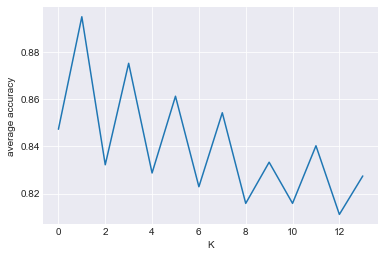

In [80]:
plot(acc_knn)
plt.ylabel('average accuracy')
plt.xlabel('K')
plt.show()